# Kaggle Titanic
## Classification - Decision Tree
[참고 | Titanic (Classifiaction Models)](https://www.kaggle.com/code/fatmakursun/titanic-classification-models)
### Decision Tree 모델을 이용한 분류
트리 기반의 `CART` 알고리즘을 이용한 분류
### 사용 라이브러리

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

### 데이터 전처리
다른 파일에서 진행했음

In [2]:
def age_pclass(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1: return 38
        elif Pclass==2: return 29
        else: return 25
    else: return Age

In [3]:
train = pd.read_csv("data/train.csv", encoding="utf-8")
train["Age"] = train[["Age", "Pclass"]].apply(age_pclass, axis=1)
train["Embarked"] = train["Embarked"].fillna('S')
train.drop(columns='Cabin', axis=1, inplace=True)
train.dropna(inplace=True)
sex = pd.get_dummies(data=train["Sex"], drop_first=True)
embark = pd.get_dummies(data=train["Embarked"], drop_first=True)
train.drop(columns=["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### 학습 및 평가

In [4]:
target = "Survived"
features_names = train.columns.tolist()
features_names.remove(target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train[features_names], train[target], test_size=0.1, stratify=train[target])
print(f"X_trian: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\n y_test: {y_test.shape}")

X_trian: (801, 9)
y_train: (801,)
X_test: (90, 9)
 y_test: (90,)


In [6]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
y_predict = model_dt.predict(X_test)

In [8]:
accuracy_score(y_test, y_predict)

0.7222222222222222

데이터 전처리를 제외한 튜닝 없이, 72점의 정확도가 나옴

### 트리 알고리즘 분석

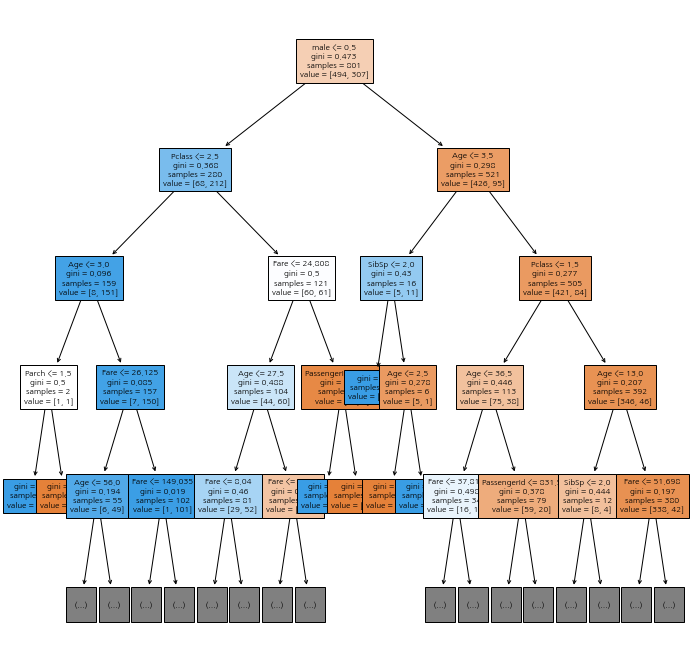

In [11]:
plt.figure(figsize=(12, 12))
pt = plot_tree(model_dt, filled=True, fontsize=8, feature_names=features_names, max_depth=4)
plt.show()

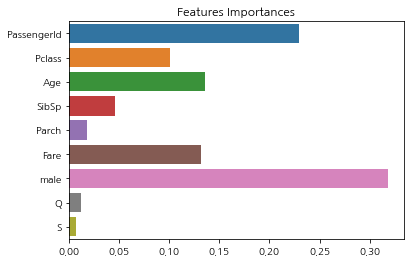

In [15]:
_ = sns.barplot(x=model_dt.feature_importances_, y=features_names).set_title("Features Importances")